In [16]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D

In [45]:
df = pd.read_csv("../Data/apples_and_oranges.csv")
df.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Weight        40 non-null     int64  
 1   Size          40 non-null     float64
 2   Class         40 non-null     object 
 3   ClassEncoder  40 non-null     int64  
 4   ClassEncoded  40 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [8]:
df.describe()

,Weight,Size
count,40.000000,40.000000
mean,70.200000,4.922750
std,3.039906,0.590063
min,65.000000,4.010000
25%,68.000000,4.360000
50%,70.000000,4.930000
75%,73.000000,5.472500
max,75.000000,5.850000


In [9]:
df["Class"].unique()

array(['orange', 'apple'], dtype=object)

In [10]:
df["Class"].value_counts()

Class
orange    20
apple     20
Name: count, dtype: int64

In [11]:
X = df[['Weight', 'Size']]
y = df['Class']

In [12]:
X.head()

,Weight,Size
0,69,4.39
1,69,4.21
2,65,4.09
3,72,5.85
4,67,4.70


In [13]:
y.head()

0    orange
1    orange
2    orange
3     apple
4    orange
Name: Class, dtype: object

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model =SVC(kernel='linear')
model.fit(X_train, y_train)

print ("Jumlah Data Training", len(X_train))
print ("Jumlah Data Uji", len(X_train))

Jumlah Data Training 32
Jumlah Data Uji 32


In [54]:
y_pred = model.predict(X_test)

print(f"Akurasi {accuracy_score(y_test, y_pred) * 100:2f}%")
print("comfirm matrix", confusion_matrix(y_test, y_pred))
print("Laporan Klasifikasi", classification_report(
    y_test, y_pred
))

Akurasi 100.000000%
comfirm matrix [[3 0]
 [0 5]]
Laporan Klasifikasi               precision    recall  f1-score   support

       apple       1.00      1.00      1.00         3
      orange       1.00      1.00      1.00         5

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



Confusion Matrix [[3 0]
 [0 5]]


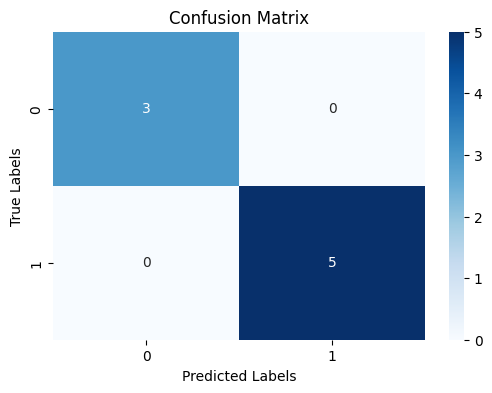

In [19]:
print("Confusion Matrix", confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

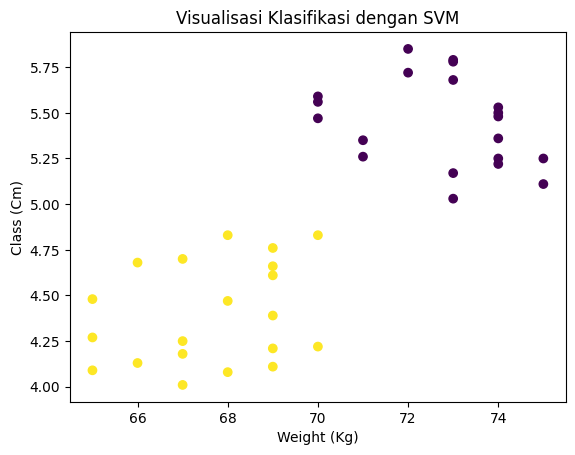

In [34]:
import matplotlib.pyplot as plt

plt.scatter(df['Weight'], df['Size'], c=df['Class'].astype('category').cat.codes)
plt.xlabel('Weight (Kg)')
plt.ylabel('Class (Cm)')
plt.title('Visualisasi Klasifikasi dengan SVM')
plt.show()

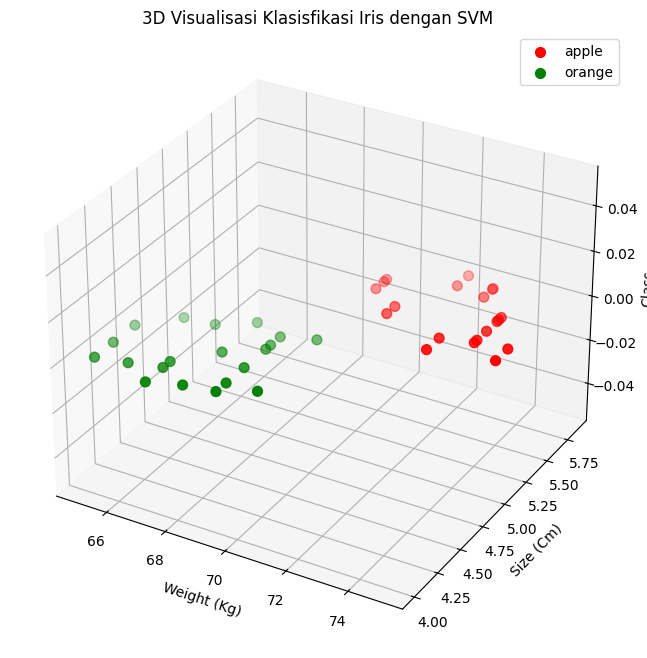

In [48]:
le = LabelEncoder()
df['ClassEncoder'] = le.fit_transform(df['Class'])

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b']
labels = le.classes_

for i, Species in enumerate(labels):
    subset = df[df['ClassEncoder'] == i]
    ax.scatter(
        subset['Weight'],
        subset['Size'],
        color=colors[i],
        label=Species,
        s=50
    )

ax.set_xlabel('Weight (Kg)')
ax.set_ylabel('Size (Cm)')
ax.set_zlabel('Class')
ax.set_title('3D Visualisasi Klasisfikasi Iris dengan SVM')
ax.legend()
plt.show()